### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [3]:
# Any missing values?
print(reviews.isnull().sum())

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [4]:
# Explore the data.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [5]:
# View the metadata
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [6]:
# Descriptive statistics.
print(reviews.describe())

               age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000  


## 2. Drop columns

In [7]:
# Drop unnecessary columns.
reviews = reviews.drop(['language', 'platform'], axis=1)

# View column names.
list(reviews.columns)

['gender',
 'age',
 'remuneration (k£)',
 'spending_score (1-100)',
 'loyalty_points',
 'education',
 'product',
 'review',
 'summary']

## 3. Rename columns

In [8]:
# Rename the column headers.
reviews = reviews.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'})

# View column names.
list(reviews.columns)

['gender',
 'age',
 'remuneration',
 'spending_score',
 'loyalty_points',
 'education',
 'product',
 'review',
 'summary']

## 4. Save the DataFrame as a CSV file

In [9]:
# Create a CSV file as output.
reviews.to_csv('clean_turtle_reviews.csv', index=False)

In [10]:
# Import new CSV file with Pandas.
clean_reviews = pd.read_csv('clean_turtle_reviews.csv')
print(clean_reviews.shape)

# View DataFrame.
clean_reviews

(2000, 9)


,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


## 5. Linear regression

### 5a) spending vs loyalty

In [11]:
# Independent variable.
x = clean_reviews[['spending_score']]

# Dependent variable.
y = clean_reviews['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = clean_reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 28 Apr 2023   Prob (F-statistic):          2.92e-263
Time:                        22:15:26   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


 > What does the summary indicates?
> - $R^2$: 45% of the total variability of y (loyalty), is explained by the variability of X (spending).  
> - F-stat: The probability of F stat. is smaller than a threshold (we assumed 0.05), so the set of variables of the regression model are significant.

In [12]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)   

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [13]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.052663) + 33.061693 * clean_reviews['spending_score']

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

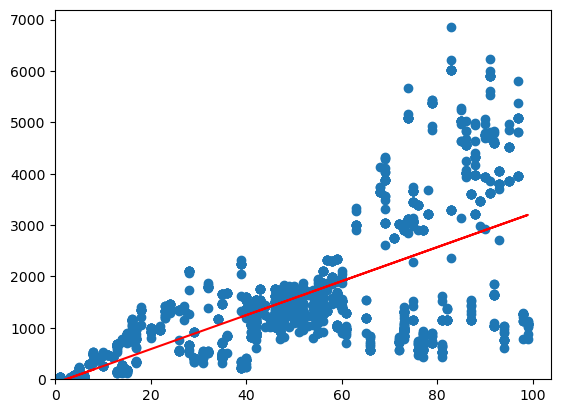

In [14]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line.
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5b) renumeration vs loyalty

In [15]:
# Independent variable.
x = clean_reviews[['remuneration']]

# Dependent variable.
y = clean_reviews['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = clean_reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 28 Apr 2023   Prob (F-statistic):          2.43e-209
Time:                        22:15:26   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> What does the summary indicates?
> - $R^2$: 38% of the total variability of y (loyalty), is explained by the variability of X (remuneration).  
> - F-stat: The probability of F stat. is smaller than the threshold (we assumed 0.05), so the set of variables of the regression model are significant.

In [16]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)   

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [17]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-65.686513) + 34.187825 * clean_reviews['remuneration']

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

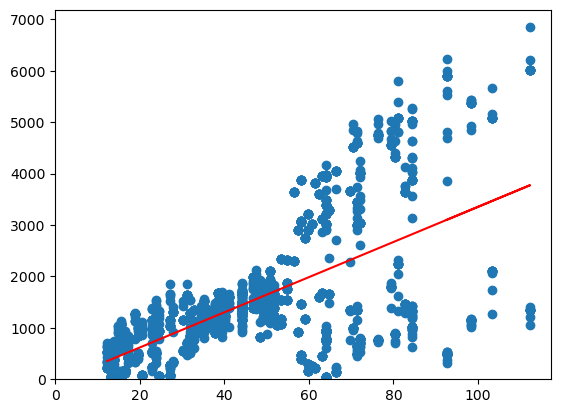

In [18]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line.
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5c) age vs loyalty

In [19]:
# Independent variable.
x = clean_reviews[['age']]

# Dependent variable.
y = clean_reviews['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = clean_reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 28 Apr 2023   Prob (F-statistic):             0.0577
Time:                        22:15:26   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> What does the summary indicates?
> - $R^2$: 2% of the total variability of y (loyalty), is explained by the variability of X (age).  
> - F-stat: The probability of F stat. is bigger than the threshold (we assumed 0.05), so the regression is not good.

In [20]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)   

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [21]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (1736.517739) + -4.012805 * clean_reviews['age']

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

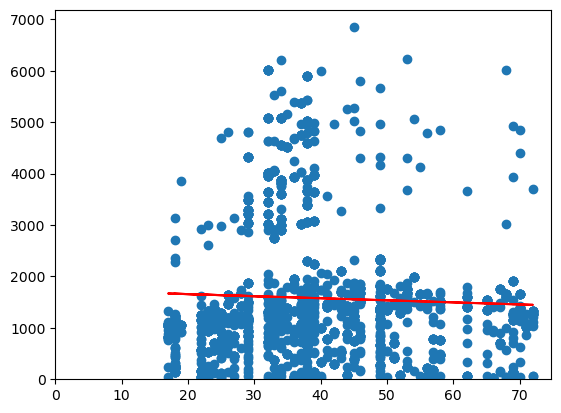

In [22]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line.
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

A high P-value (> 0.05) means that we cannot conclude that the explanatory variable affects the dependent variable

## 6. Observations and insights

To perform the linear regression analysis, we specify the independent variable (age, remuneration, and spending score) and the dependent variable (loyalty points). We add a constant to the independent variables and create the OLS model. We extract the estimated parameters, standard errors, and predicted values. We then generate a regression table based on the X coefficient and constant values. Finally, we plot the linear regression and add a regression line.

Both the spending vs loyalty and the renumeration vs loyalty models are significant but the age vs loyalty as a p value bigger than 0.05 so it can not be used. 

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [23]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [24]:
# Load the CSV file(s) as df2.
df2 = clean_reviews[["remuneration", "spending_score"]]

# View DataFrame.
df2

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [25]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [26]:
# Descriptive statistics.
df2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

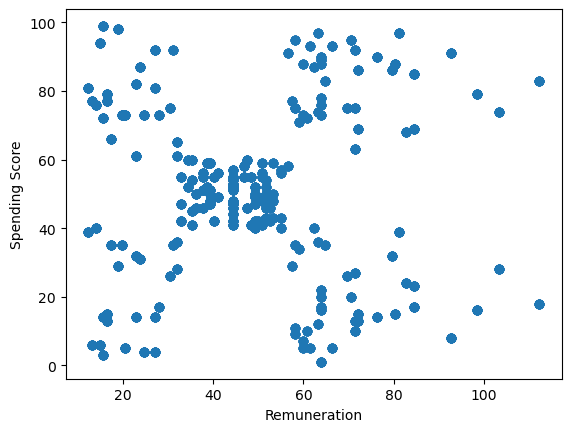

In [27]:
# Create a scatterplot with Seaborn.
plt.scatter(df2["remuneration"], df2["spending_score"])
plt.xlabel("Remuneration")
plt.ylabel("Spending Score")
plt.show()

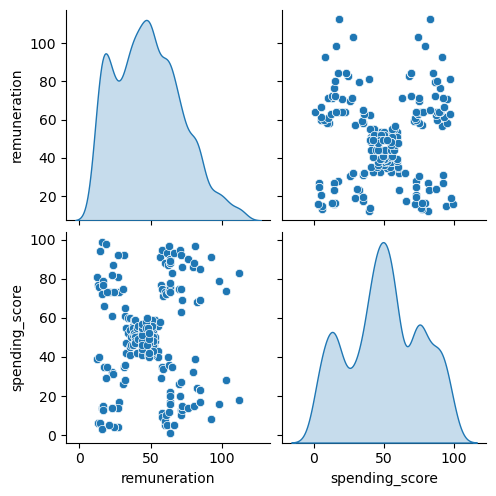

In [28]:
# Create a pairplot with Seaborn.
sns.pairplot(df2, diag_kind = 'kde')
plt.show()

## 3. Elbow and silhoutte methods

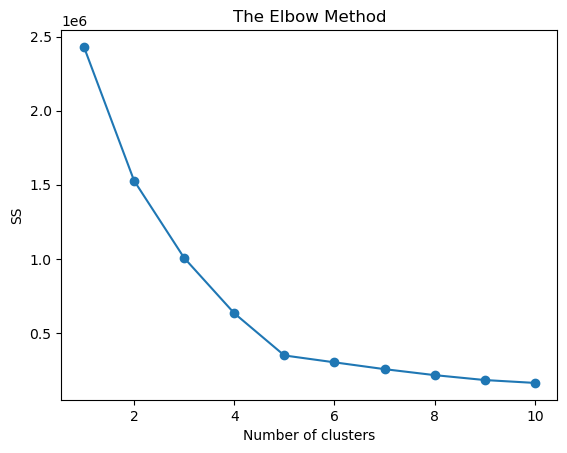

In [29]:
# Determine the number of clusters: Elbow method.
# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(df2)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

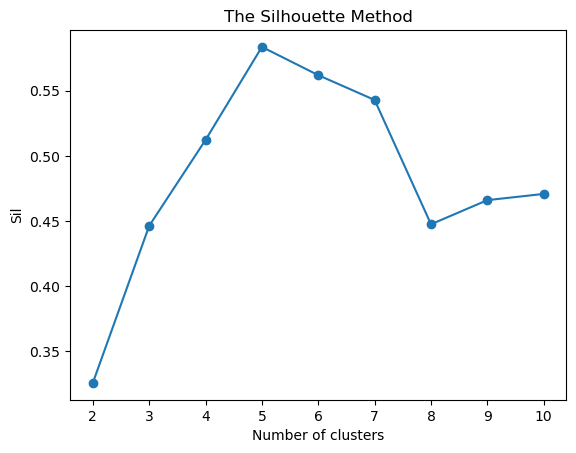

In [30]:
# Determine the number of clusters: Silhouette method.
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(df2)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df2,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

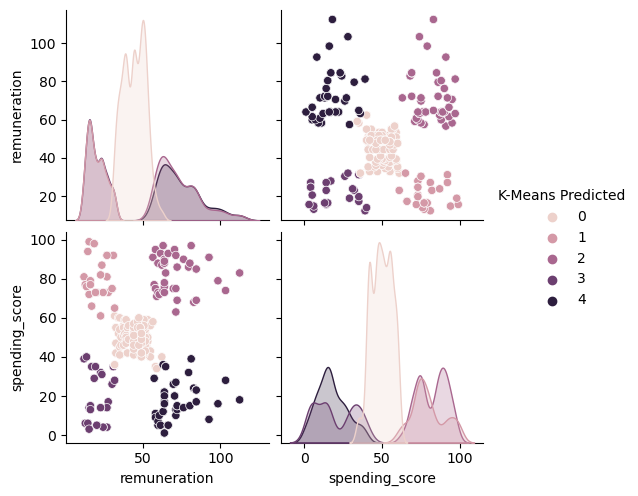

In [31]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [32]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

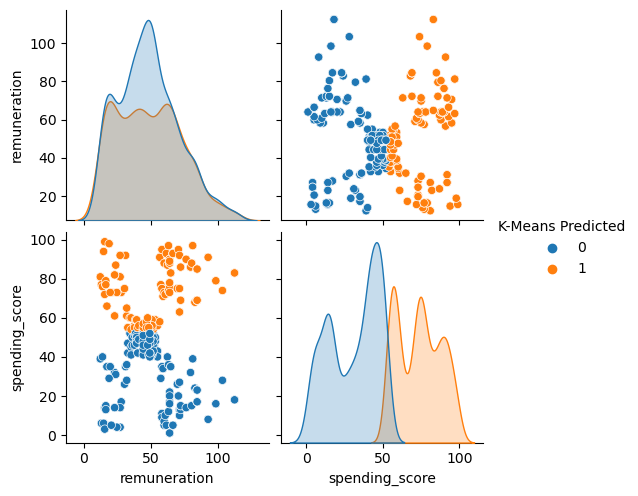

In [33]:
# Use 2 clusters:
kmeans = KMeans(n_clusters = 2,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [34]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    1106
1     894
Name: K-Means Predicted, dtype: int64

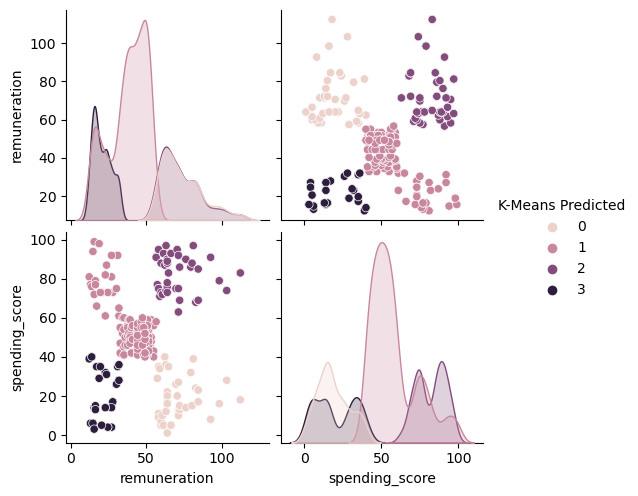

In [35]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [36]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

1    1013
2     356
0     351
3     280
Name: K-Means Predicted, dtype: int64

## 5. Fit final model and justify your choice

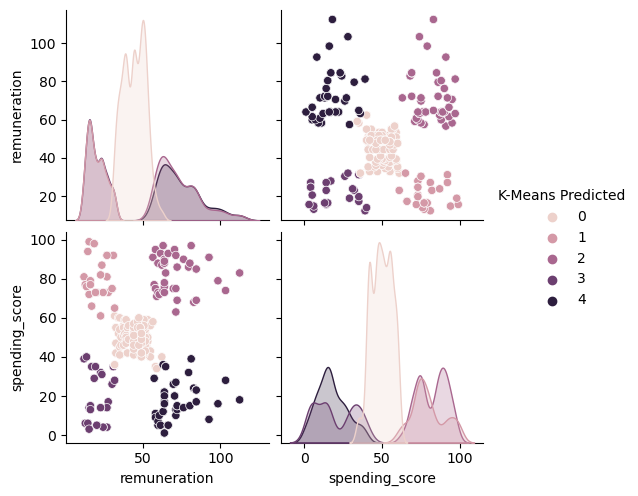

In [37]:
# Apply the final model.
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [38]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

,remuneration,spending_score,K-Means Predicted
0,12.30,39,3
1,12.30,81,1
2,13.12,6,3
3,13.12,77,1
4,13.94,40,3
...,...,...,...
1995,84.46,69,2
1996,92.66,8,4
1997,92.66,91,2
1998,98.40,16,4


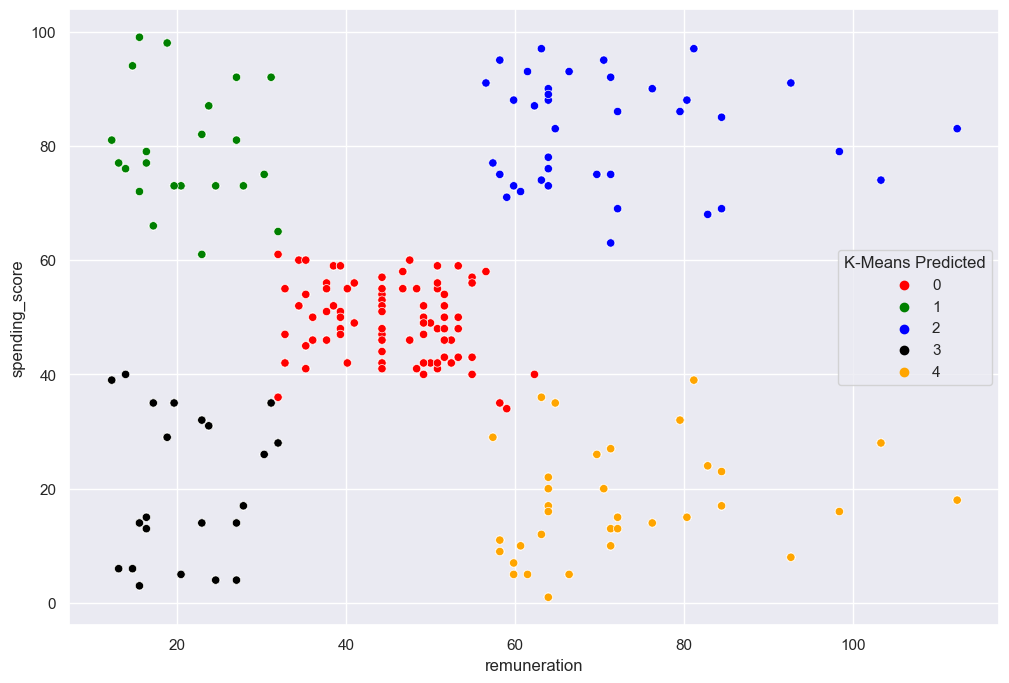

In [39]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(df2["remuneration"], df2["spending_score"], data=df2 , 
                hue='K-Means Predicted',
               palette=['red', 'green', 'blue', 'black', 'orange'])

# View the DataFrame.
df2

## 7. Discuss: Insights and observations

***Your observations here...***

It seems that k=5 (five clusters) might give the best results (groups). The 4 groups seem to be related, Cluster 0 for both k=3, k=4 and k=5 is the largest group. The number of predicted values per class indicates a better distribution for k=5 than k=3 and k=4. 

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [40]:
# Import all the necessary packages.
!pip install wordcloud
!pip install textblob

import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\filip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\filip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
# Load the data set as df3.
df3 = clean_reviews

# View DataFrame.
df3

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [42]:
# Explore data set.
df3.info()
print(df3.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
               age  remuneration  spending_score  loyalty_points       product
count  2000.000000   2000.000000     2000.000000     2000.000000   2000.000000
mean     39.495000     48.079060       50.000000     1578.032000   4320.521500
std      13.573212     23.123984       26.094702     1283.239705   3148.938839
min      17.000000 

In [43]:
# Keep necessary columns. Drop unnecessary columns.
df3 = clean_reviews[["review", "summary"]]

# View DataFrame.
df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [44]:
# Determine if there are any missing values.
print(df3.isnull().sum())

review     0
summary    0
dtype: int64


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [45]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the results
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [46]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the results
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [47]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]', '')

# View output.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [48]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]', '')

# View output.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [49]:
# Drop duplicates in both columns.
df3.drop_duplicates(subset=["review", "summary"])
df3.reset_index(inplace = True)

# View DataFrame.
df3

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap
...,...,...,...
1995,1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,1996,great game did not think i would like it when ...,super fun
1997,1997,great game for all keeps the mind nimble,great game
1998,1998,fun game,four stars


## 3. Tokenise and create wordclouds

In [50]:
# Create new DataFrame (copy DataFrame).
df4 = df3[['review', 'summary']]

# View DataFrame.
df4.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [51]:
# Apply tokenisation to both columns.
df4['review'] = df4['review'].apply(word_tokenize) 
df4['summary'] = df4['summary'].apply(word_tokenize) 

# View DataFrame.
df4.head()

,review,summary
0,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [52]:
# Review: Create a word cloud.
# Create a list of all tokens in the Review column 
all_reviews = []
for token_list in df4['review']:
    all_reviews = all_reviews + token_list
    
# Join the tokens into a single string
all_reviews_str = ' '.join(all_reviews)

In [53]:
# Set the colour palette
sns.set(color_codes=True)
# Create the WordCloud object. 
word_cloud_review = WordCloud(width = 1600, height = 900,
                             background_color = 'white',
                             colormap = 'plasma',
                             stopwords = 'none',
                             min_font_size = 10).generate(all_reviews_str)

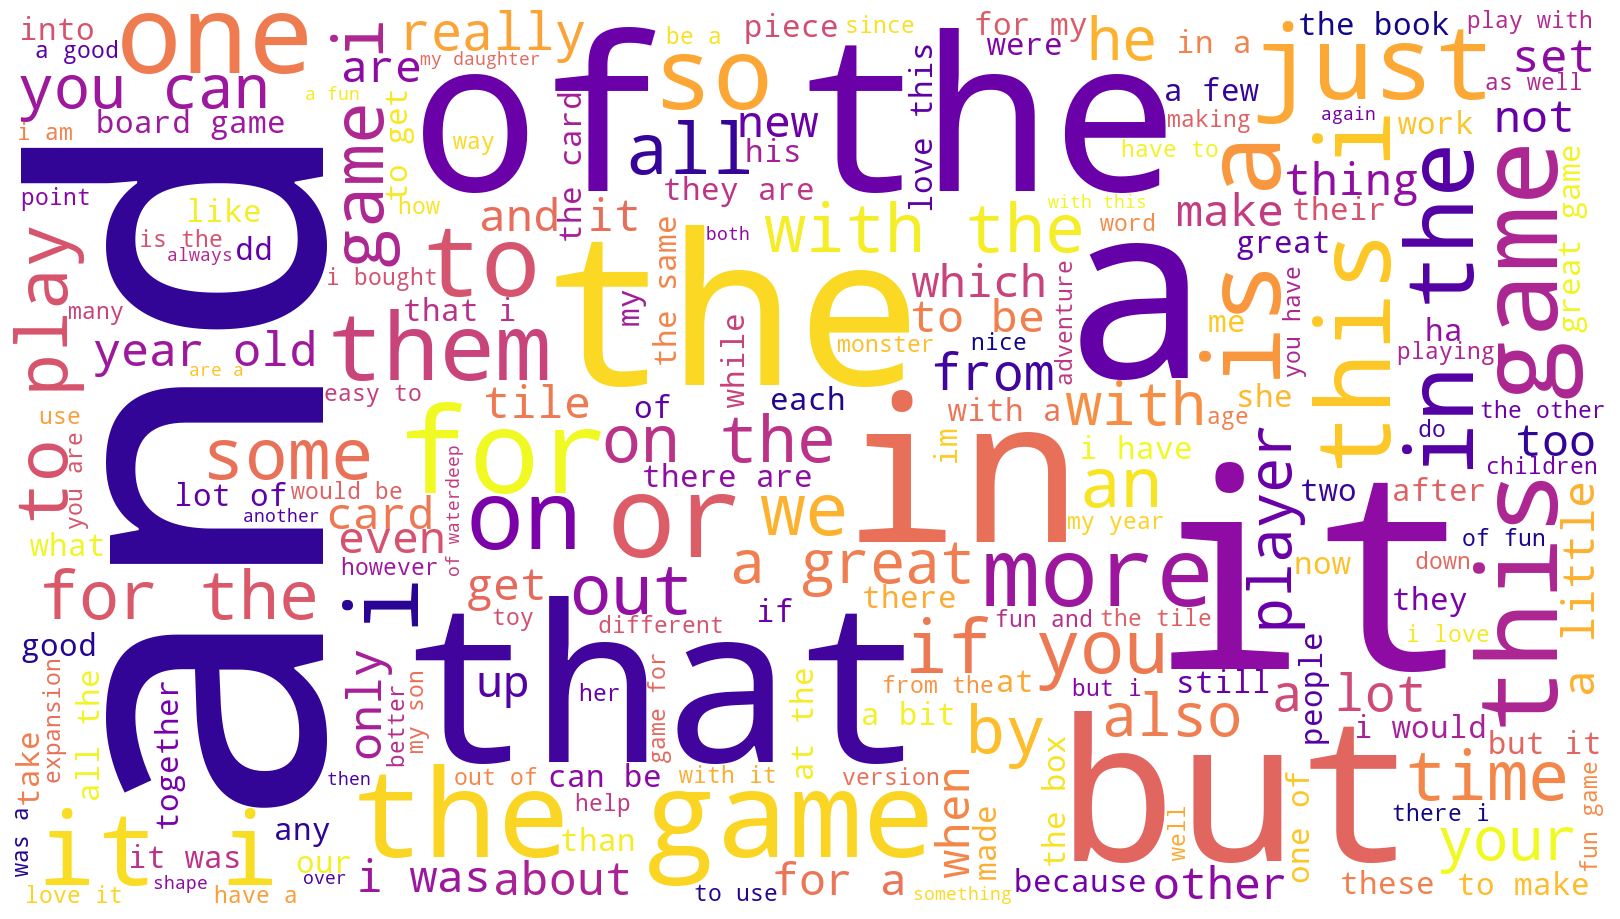

In [54]:
# Review: Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor = None)
plt.imshow(word_cloud_review)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [55]:
# Summary: Create a word cloud.
# Create a list of all tokens in the Review column 
all_summary = []
for token_list in df4['review']:
    all_summary = all_summary + token_list
    
# Join the tokens into a single string
all_summary_str = ' '.join(all_summary)

In [56]:
# Set the colour palette
sns.set(color_codes=True)
# Create the WordCloud object. 
word_cloud_summary = WordCloud(width = 1600, height = 900,
                             background_color = 'white',
                             colormap = 'plasma',
                             stopwords = 'none',
                             min_font_size = 10).generate(all_summary_str)

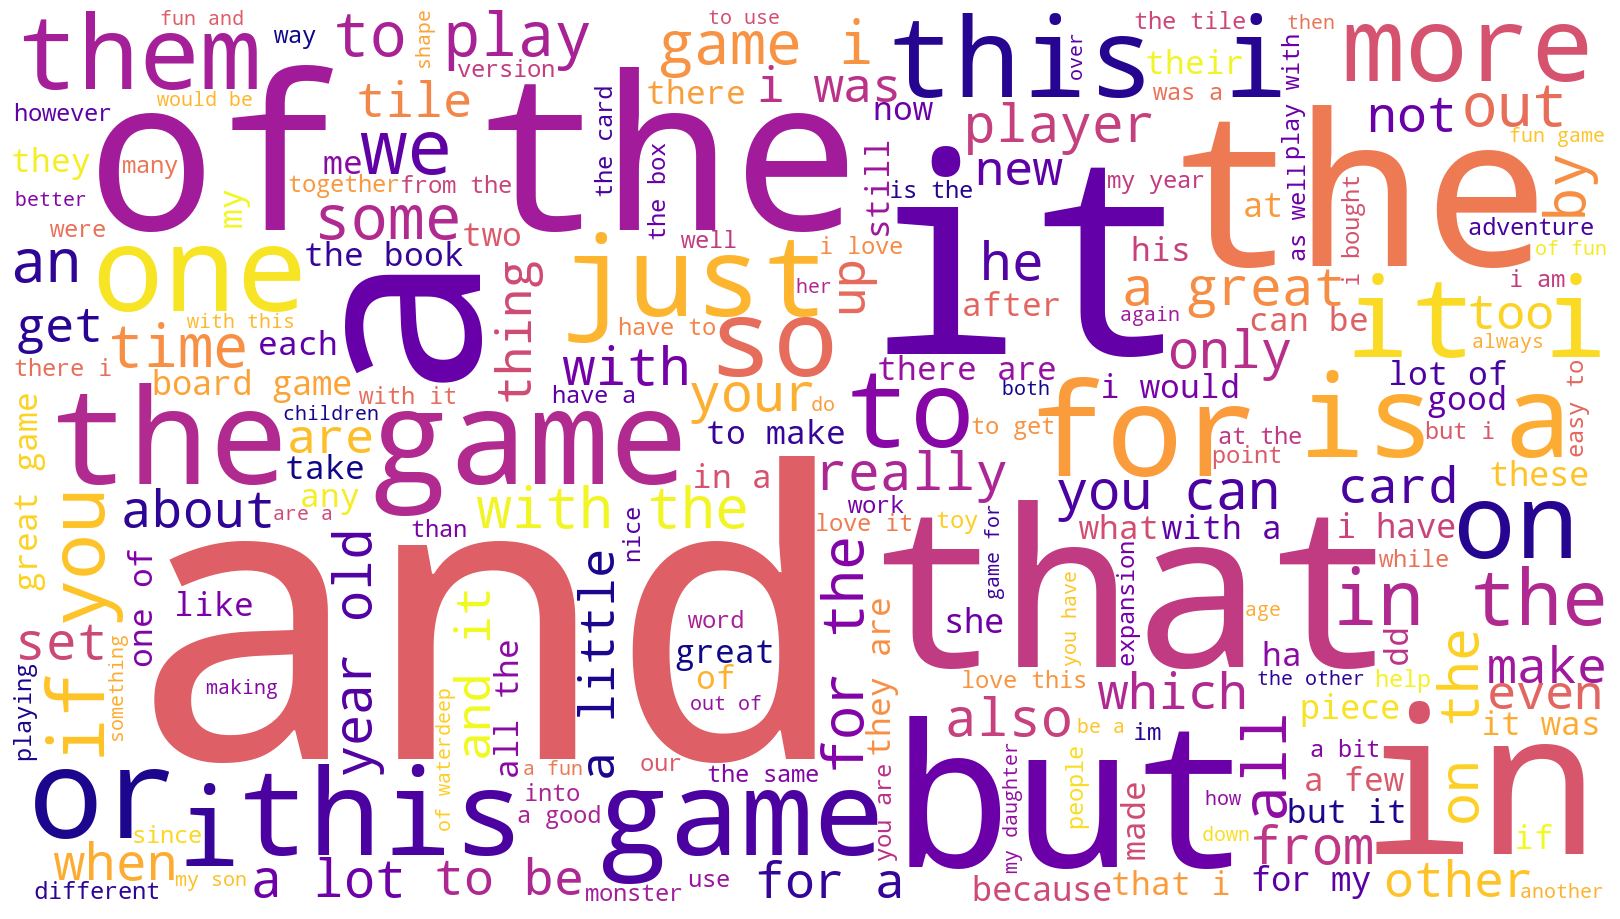

In [57]:
# Summary: Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor = None)
plt.imshow(word_cloud_summary)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [58]:
# Concatenate both token strings for review and summary 
all_tokens = all_reviews + all_summary

all_tokens

['when',
 'it',
 'comes',
 'to',
 'a',
 'dms',
 'screen',
 'the',
 'space',
 'on',
 'the',
 'screen',
 'itself',
 'is',
 'at',
 'an',
 'absolute',
 'premium',
 'the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'as',
 'well',
 'makes',
 'it',
 'completely',
 'useless',
 'the',
 'only',
 'reason',
 'that',
 'i',
 'gave',
 'it',
 '2',
 'stars',
 'and',
 'not',
 '1',
 'was',
 'that',
 'technically',
 'speaking',
 'it',
 'can',
 'at',
 'least',
 'still',
 'stand',
 'up',
 'to',
 'block',
 'your',
 'notes',
 'and',
 'dice',
 'rolls',
 'other',
 'than',
 'that',
 'it',
 'drops',
 'the',
 'ball',
 'completely',
 'an',
 'open',
 'letter',
 'to',
 'galeforce9',
 'your',
 'unpainted',
 'miniatures',
 'are',
 'very',
 'not',
 'bad',
 'your',
 'spell',
 'cards',
 'are',
 'great',
 'your',
 'board',
 'games',
 'are',
 'meh',
 'your',
 'dm',
 'screens',
 'however',
 'are',
 'freaking',
 't

In [59]:
# Determine the frequency distribution.
fdist = FreqDist(all_tokens)

# Print the 10 most common tokens and their frequencies
print(fdist.most_common(10))

[('the', 10904), ('and', 6468), ('to', 6328), ('a', 6322), ('of', 4976), ('i', 4182), ('it', 4180), ('is', 3564), ('this', 3552), ('game', 3370)]


### 4b) Remove alphanumeric characters and stopwords

In [60]:
# Delete all the alpanum.
tokens1 = [word for word in all_tokens if word.isalnum()]

In [61]:
# Remove all the stopwords
# Create a set of English stop words
all_english_words = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words
tokens2 = [x for x in tokens1 if x.lower() not in all_english_words]

# Define an empty string variable
tokens2_string = ''
for value in tokens2:
    # Add each filtered token word to the string
    tokens2_string = tokens2_string + value + ' '

### 4c) Create wordcloud without stopwords

In [62]:
# Create a wordcloud without stop words.
# Set the colour palette
sns.set(color_codes=True)
# Create the WordCloud object. 
word_cloud = WordCloud(width = 1600, height = 900,
                             background_color = 'white',
                             colormap = 'plasma',
                             stopwords = 'none',
                             min_font_size = 10).generate(tokens2_string)

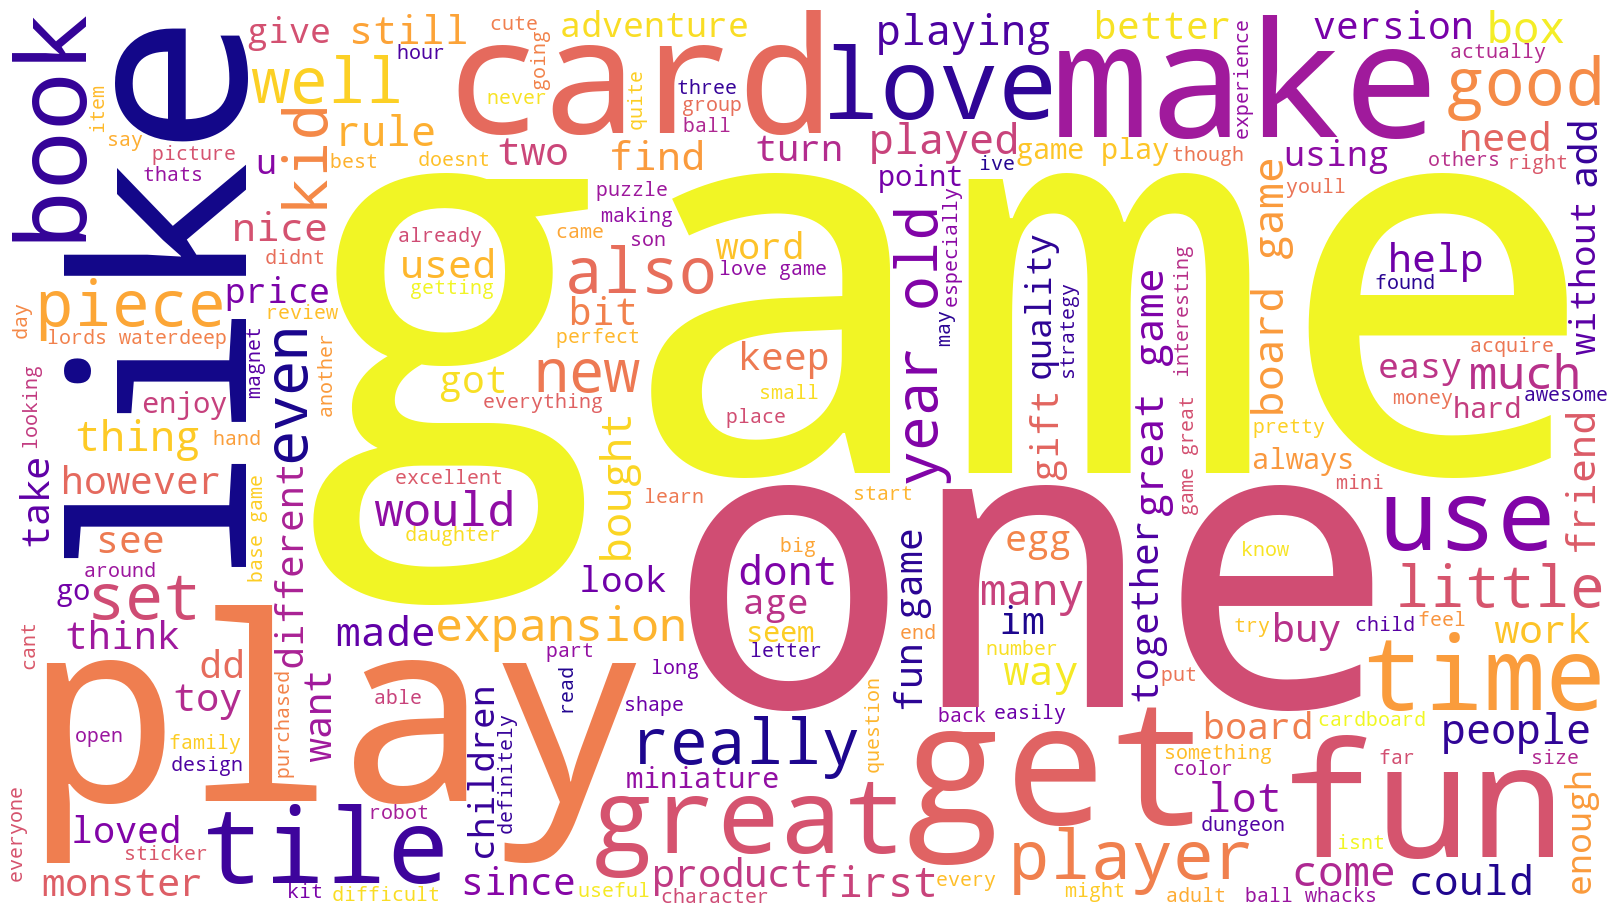

In [63]:
# Plot the wordcloud image.
plt.figure(figsize=(16, 9), facecolor = None)
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

### 4d) Identify 15 most common words and polarity

In [64]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Determine the 15 most common words.
fdist = FreqDist(tokens2)

# Get the 15 most common words and their frequencies
most_common = fdist.most_common(15)

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate the sentiment polarity for each word
for word, frequency in most_common:
    # Get the sentiment polarity score for the word
    scores = analyzer.polarity_scores(word)
    # Print the word, its frequency, and its sentiment polarity score
    print(word, frequency, scores)

game 3370 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
great 1192 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249}
fun 1106 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5106}
one 1060 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
play 1004 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.34}
like 828 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3612}
love 662 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}
really 638 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
get 638 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
cards 602 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
tiles 594 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
good 588 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}
time 582 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
would 560 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
book 546 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [65]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [66]:
df5 = df3[['review', 'summary']]

# Determine polarity of both columns. 
df5['review_polarity'] = df5['review'].apply(generate_polarity)
df5['summary_polarity'] = df5['summary'].apply(generate_polarity)

# View output.
df5

,review,summary,review_polarity,summary_polarity
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,-0.036111,0.150000
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,0.035952,-0.800000
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,0.116640,0.000000
3,amazing buy bought it as a gift for our new dm...,five stars,0.578788,0.000000
4,as my review of gf9s previous screens these we...,money trap,-0.316667,0.000000
...,...,...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom,0.168750,0.200000
1996,great game did not think i would like it when ...,super fun,0.158333,0.316667
1997,great game for all keeps the mind nimble,great game,0.200000,0.200000
1998,fun game,four stars,-0.050000,0.000000


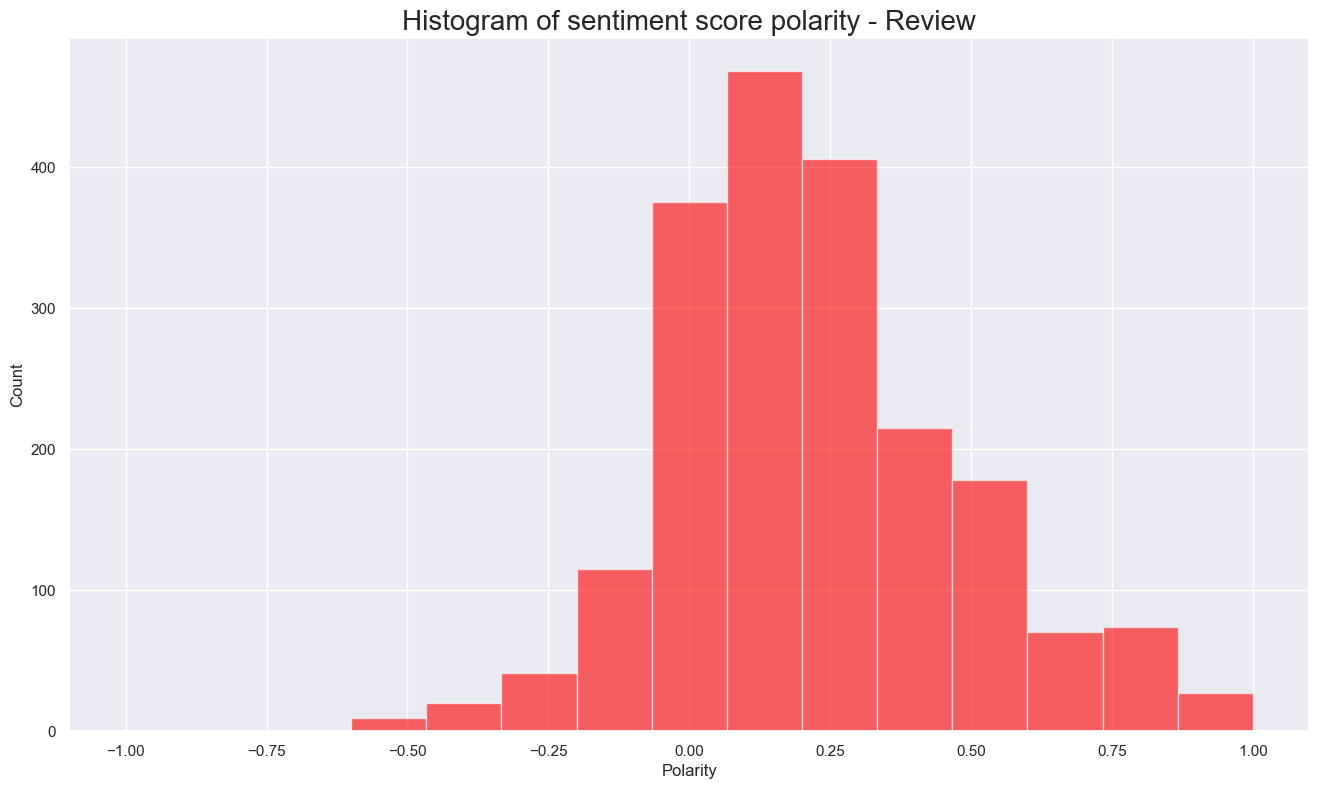

In [67]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df5['review_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity - Review', fontsize=20)

plt.show()

# Histogram of sentiment score


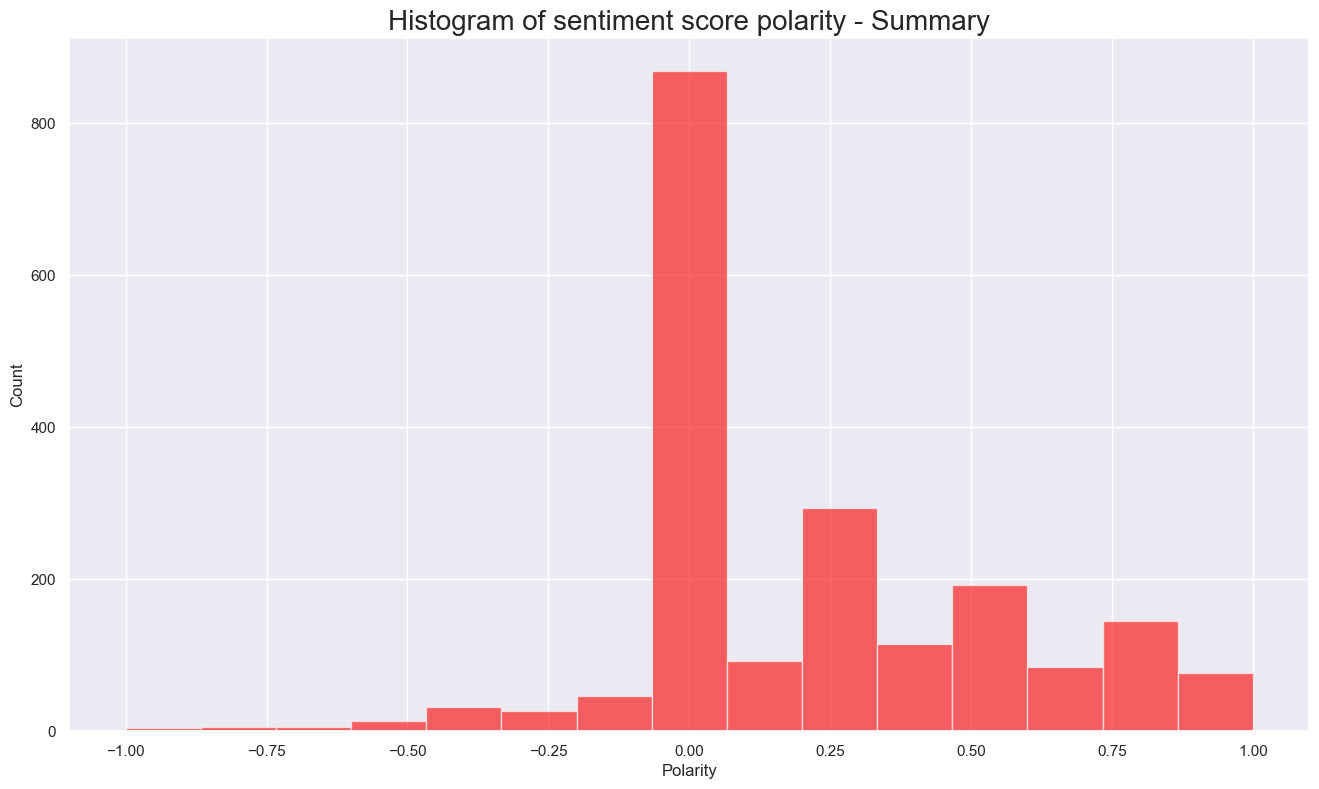

In [68]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df5['summary_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity - Summary', fontsize=20)

plt.show()

# Histogram of sentiment score


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [69]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_sentiment = df5.nsmallest(20, 'review_polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['review', 'review_polarity']]

# View output.
negative_sentiment.style.set_properties(subset=['review'])


,review,review_polarity
208,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000
182,incomplete kit very disappointing,-0.780000
1804,im sorry i just find this product to be boring and to be frank juvenile,-0.583333
364,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,-0.550000
117,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,-0.500000
227,this was a gift for my daughter i found it difficult to use,-0.500000
230,i found the directions difficult,-0.500000
290,instructions are complicated to follow,-0.500000
301,difficult,-0.500000
1524,expensive for what you get,-0.500000


In [70]:
# Top 20 negative summaries.
# Create a DataFrame.
negative_sentiment = df5.nsmallest(20, 'summary_polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['summary', 'summary_polarity']]

# View output.
negative_sentiment.style.set_properties(subset=['summary'])

,summary,summary_polarity
21,the worst value ive ever seen,-1.000000
208,boring unless you are a craft person which i am,-1.000000
829,boring,-1.000000
1166,before this i hated running any rpg campaign dealing with towns because it,-0.900000
1,another worthless dungeon masters screen from galeforce9,-0.800000
144,disappointed,-0.750000
631,disappointed,-0.750000
793,disappointed,-0.750000
1620,disappointed,-0.750000
363,promotes anger instead of teaching calming methods,-0.700000


In [71]:
# Top 20 positive reviews.
# Create a DataFrame.
positive_sentiment = df5.nlargest(20, 'review_polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['review', 'review_polarity']]

# View output.
positive_sentiment.style.set_properties(subset=['review_polarity'])

,review,review_polarity
7,came in perfect condition,1.000000
165,awesome book,1.000000
194,awesome gift,1.000000
496,excellent activity for teaching selfmanagement skills,1.000000
524,perfect just what i ordered,1.000000
591,wonderful product,1.000000
609,delightful product,1.000000
621,wonderful for my grandson to learn the resurrection story,1.000000
790,perfect,1.000000
933,awesome,1.000000


In [72]:
# Top 20 positive summaries.
# Create a DataFrame.
positive_sentiment = df5.nlargest(20, 'summary_polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['summary', 'summary_polarity']]

# View output.
positive_sentiment.style.set_properties(subset=['summary'])

,summary,summary_polarity
6,best gm screen ever,1.000000
28,wonderful designs,1.000000
32,perfect,1.000000
80,theyre the perfect size to keep in the car or a diaper,1.000000
134,perfect for preschooler,1.000000
140,awesome sticker activity for the price,1.000000
161,awesome book,1.000000
163,he was very happy with his gift,1.000000
187,awesome,1.000000
210,awesome and welldesigned for 9 year olds,1.000000


## 7. Discuss: Insights and observations

***Your observations here...***

We can see from the analysis above that the reviews column as a more positive polarity than the summary column, this was inferred from both histograms. Looking at the top 20 observations for both columns we can see that the negative comments use the words boring, disappointing a lot, while the positive comments use the words excellent, perfect, quality and awesome This can be very useful for the marketing team to analyse and use in future campaigns. 

# 